In [1]:
library(graphicalExtremes)
library(maxstablePCA)
library(GGally)
library(dplyr)
library(Matrix)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
set.seed(9092024)

In [3]:
danube$info

RivNames,Lat,Long,AveVol,Lat_Center,Long_Center,Alt,Area,Chos,Density,Slope,PlotCoordX,PlotCoordY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Donau,48.58200,13.504000,1423.00000,48.19434,11.537729,826.6172,9.24909687,4,4870.474,13.264409,0,0
Donau,48.67663,13.115173,638.87746,48.51557,11.131992,624.3137,5.76796492,5,5003.040,9.885689,-2,-1
Donau,48.87976,12.747233,456.92169,48.62814,10.997088,603.4865,4.58691170,6,4896.329,9.518746,-4,-2
Donau,49.02358,12.138709,446.94998,48.61170,10.909059,615.9089,4.30697944,7,4907.390,9.648475,-4,-4
Donau,48.94696,12.014945,351.88196,48.33618,10.419301,649.6616,3.18819483,8,5019.066,9.845116,-2,-4
Donau,48.91661,11.864296,329.31747,48.23405,10.310134,674.7989,2.78700337,9,5072.189,10.068094,-2,-6
Donau,48.75742,11.426064,312.06499,48.18079,10.156106,707.6364,2.45730480,10,5115.251,10.489882,-2,-8
Donau,48.71074,10.801443,191.21095,48.24435,9.949147,653.4999,1.83826254,11,5066.171,9.351132,-2,-10
Donau,48.56840,10.500539,162.04203,48.09448,9.798394,701.1765,1.44211361,12,5130.739,9.788958,-2,-12


### Transform data to (approxmately) unit Pareto scale for the spectral measure estimator

In [4]:
Xtrafo <- transform_unitpareto(danube$data_clustered)

In [5]:
dim(Xtrafo)

[1] 428  31

In [6]:
summary(rowSums(Xtrafo))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.48   47.70   70.62  206.61  139.21 7092.21 

In [7]:
quantile(rowSums(Xtrafo), c(0.75, 0.8, 0.9, 0.95, 0.99), na.rm = T)

75%       80%       90%       95%       99% 
 139.2090  179.3545  377.9689  734.2403 2422.6935

In [8]:
length(which(apply(Xtrafo, 1, max) > 10))

[1] 117

For comparability with other methods, we use the same data, therefore choose the $l_{\infty}$-norm and set the threshold to the $0.1$ quantile of a standard pareto distribution. 

### Run the extremal PCA fits 

In [9]:
Xsphere <- t(apply(Xtrafo, 1, function(z) z / max(z)))
Xsphere <- Xsphere[which(apply(Xtrafo, 1, max) > 10), ]

In [10]:
specdecomp <- eigen(t(Xsphere) %*% Xsphere / 117)
specdecomp

eigen() decomposition
$values
 [1] 3.546300980 0.425474298 0.334800990 0.197831723 0.147402500 0.138535383
 [7] 0.100702548 0.049739725 0.039491939 0.024920208 0.024097070 0.018763672
[13] 0.014651236 0.012780795 0.011545448 0.010190902 0.009435911 0.007796057
[19] 0.007398298 0.006205594 0.005918799 0.005258325 0.004787018 0.004160525
[25] 0.003601415 0.003016159 0.002649505 0.002059084 0.001794380 0.001328053
[31] 0.001115416

$vectors
            [,1]         [,2]         [,3]         [,4]         [,5]
 [1,] -0.1800225  0.096446217  0.076316752 -0.004589768  0.132285211
 [2,] -0.1726358 -0.085705843 -0.074074221  0.068433887  0.155936534
 [3,] -0.1729024 -0.134904938 -0.051968575 -0.035712678  0.107863345
 [4,] -0.1734663 -0.150108959 -0.066369241 -0.062550418  0.111023104
 [5,] -0.1807953 -0.102034155 -0.182619714 -0.041993445  0.108926692
 [6,] -0.1791170 -0.088712939 -0.184717248 -0.042303375  0.091272919
 [7,] -0.1828094 -0.085380850 -0.182896414 -0.050840793  0.088075103
 [8,] 

Saving 6.67 x 6.67 in image


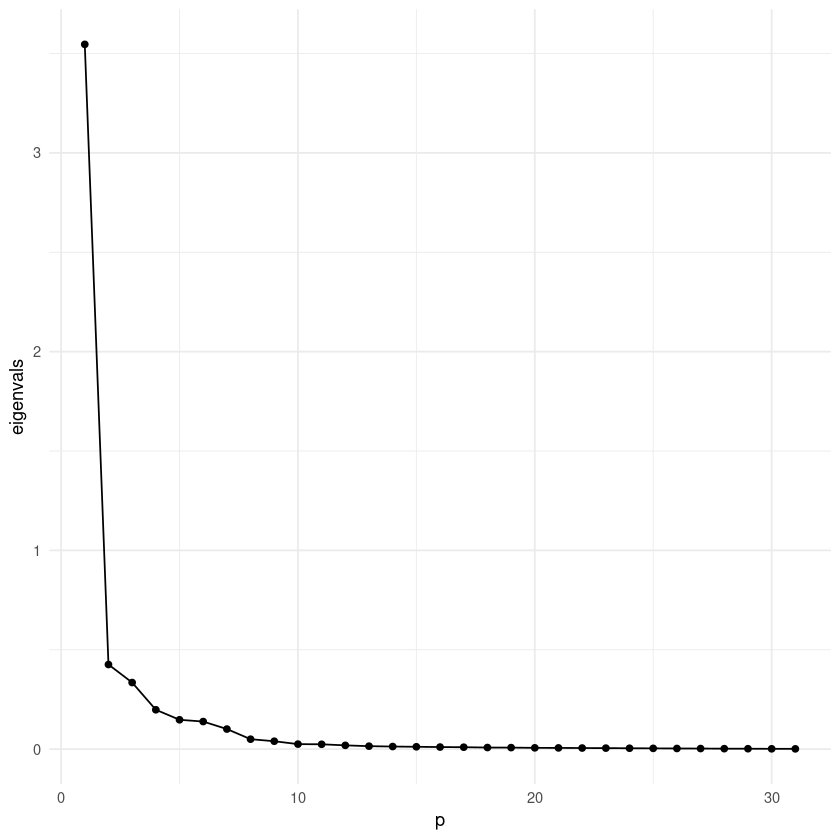

In [11]:
elbow_dat <- data.frame(p = 1:31, eigenvals = specdecomp$values)
elbow_epca_ds <- ggplot(aes(x = p, y = eigenvals), data = elbow_dat) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_epca_ds.pdf", elbow_epca_ds)
elbow_epca_ds

Saving 6.67 x 6.67 in image


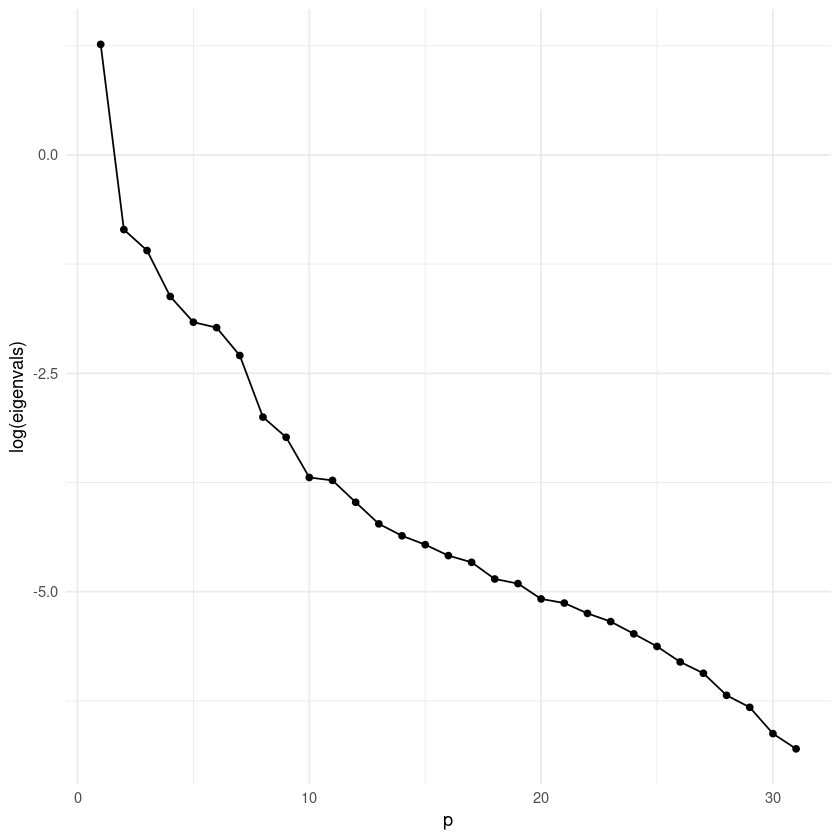

In [12]:
elbow_epca_ds_log <- ggplot(aes(x = p, y = log(eigenvals)), data = elbow_dat) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_log_epca_ds.pdf", elbow_epca_ds_log)
elbow_epca_ds_log

#### Test if using Pareto or Fréchet margins makes a big difference

In [13]:
Xspheref <- t(apply(transform_unitfrechet(Xtrafo), 1, function(z) z / max(z)))
Xspheref <- Xspheref[which(apply(transform_unitfrechet(Xtrafo), 1, max) > 10), ]

In [14]:
specdecompf <- eigen(t(Xspheref) %*% Xspheref / 117)
specdecompf

eigen() decomposition
$values
 [1] 3.254741160 0.443954821 0.347345361 0.205222343 0.151160607 0.143341545
 [7] 0.103789913 0.050723823 0.039866705 0.025274258 0.024252668 0.019018717
[13] 0.015078583 0.013056477 0.011839301 0.010256677 0.009527994 0.007957954
[19] 0.007444698 0.006293042 0.006171491 0.005431503 0.004911635 0.004210962
[25] 0.003712815 0.003083649 0.002757121 0.002113643 0.001835733 0.001372455
[31] 0.001128546

$vectors
            [,1]         [,2]         [,3]         [,4]         [,5]
 [1,] -0.1811688  0.093919045  0.075195692 -0.001821816  0.142728763
 [2,] -0.1729962 -0.086163308 -0.074478604  0.072026911  0.154088672
 [3,] -0.1731497 -0.135382276 -0.054124134 -0.032160072  0.111214339
 [4,] -0.1734208 -0.150069470 -0.068253932 -0.059159755  0.115344145
 [5,] -0.1816326 -0.101777278 -0.182812349 -0.037783665  0.109299085
 [6,] -0.1798033 -0.088621363 -0.185216707 -0.038473193  0.090948509
 [7,] -0.1838480 -0.085306643 -0.183422288 -0.046963187  0.087235665
 [8,] 

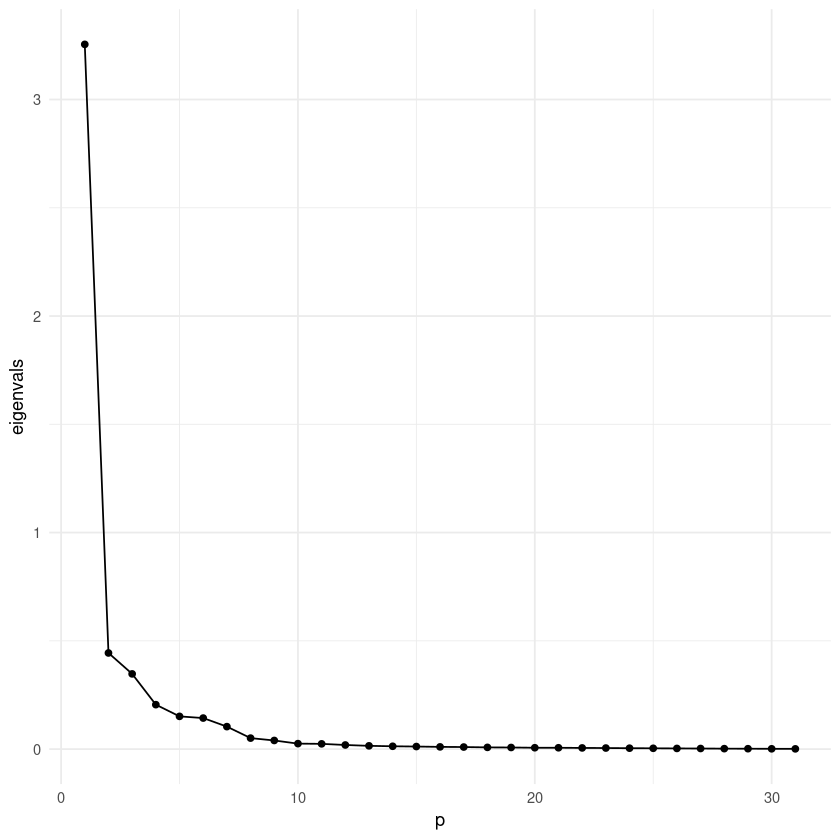

In [15]:
elbow_datf <- data.frame(p = 1:31, eigenvals = specdecompf$values)
elbow_epcaf_ds <- ggplot(aes(x = p, y = eigenvals), data = elbow_datf) +
geom_line() + 
geom_point () + 
theme_minimal()

elbow_epcaf_ds

We claim that the results are comparable. 

### Some visualizations

In [16]:
donau_iller <- 1:12
lech <- 20:22
naab <- 23:24
regen <- 25:27
isar <- 14:19
inn <- c(13, 28:31)

danube$info$arm <- NA
danube$info$arm[donau_iller] <- "arm1"
danube$info$arm[lech] <- "arm2"
danube$info$arm[naab] <- "arm3"
danube$info$arm[regen] <- "arm4"
danube$info$arm[isar] <- "arm5"
danube$info$arm[inn] <- "arm6"

In [17]:
arm1 = transform_unitfrechet(apply(Xtrafo[,donau_iller], 1, max))
arm2 = transform_unitfrechet(apply(Xtrafo[, lech], 1, max))
arm3 = transform_unitfrechet(apply(Xtrafo[, naab], 1, max))
arm4 = transform_unitfrechet(apply(Xtrafo[, regen], 1, max))
arm5 = transform_unitfrechet(apply(Xtrafo[, isar], 1, max))
arm6 = transform_unitfrechet(apply(Xtrafo[, inn], 1, max))

dat_plot_riverarm_max <- data.frame(
    arm1 = arm1, 
    arm2 = arm2, 
    arm3 = arm3, 
    arm4 = arm4, 
    arm5 = arm5, 
    arm6 = arm6
)


### plot the river arms for better data presentation

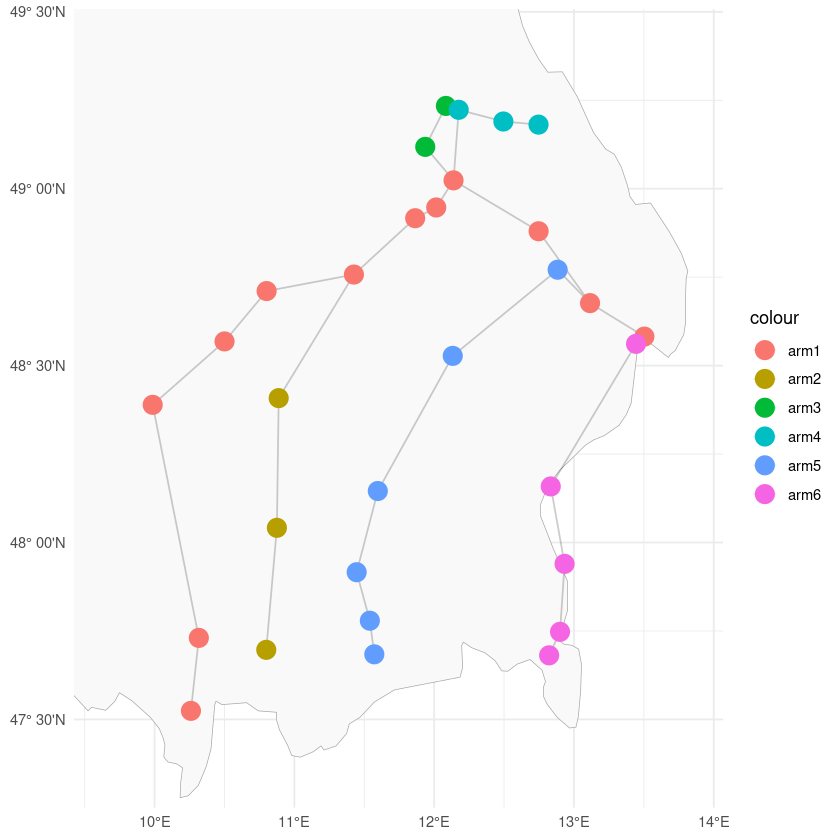

In [18]:
p <- graphicalExtremes::plotDanube(returnGGPlot = T)

pdanube_arms <- p + geom_point(aes(x = Long, y = Lat, color = arm), data = danube$info, size = 5) + theme_minimal()
pdanube_arms

In [19]:
ggsave("arms_danube.pdf", pdanube_arms, width = 12, height = 12, dpi = 320)

### Create plots of the extremal principal components

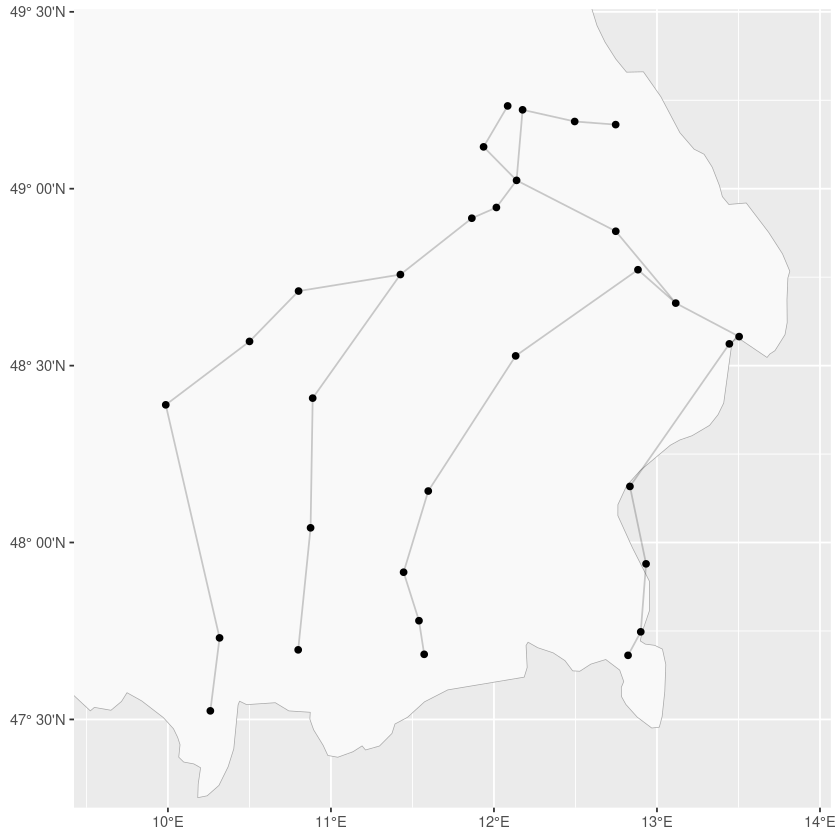

In [20]:
p <- graphicalExtremes::plotDanube(returnGGPlot = T)
p

In [21]:
enc <- specdecomp$vectors
enc <- data.frame(enc)
names(enc) <- paste0("PC", 1:31)
enc$lat <- danube$info$Lat
enc$lon <- danube$info$Long

Saving 6.67 x 6.67 in image


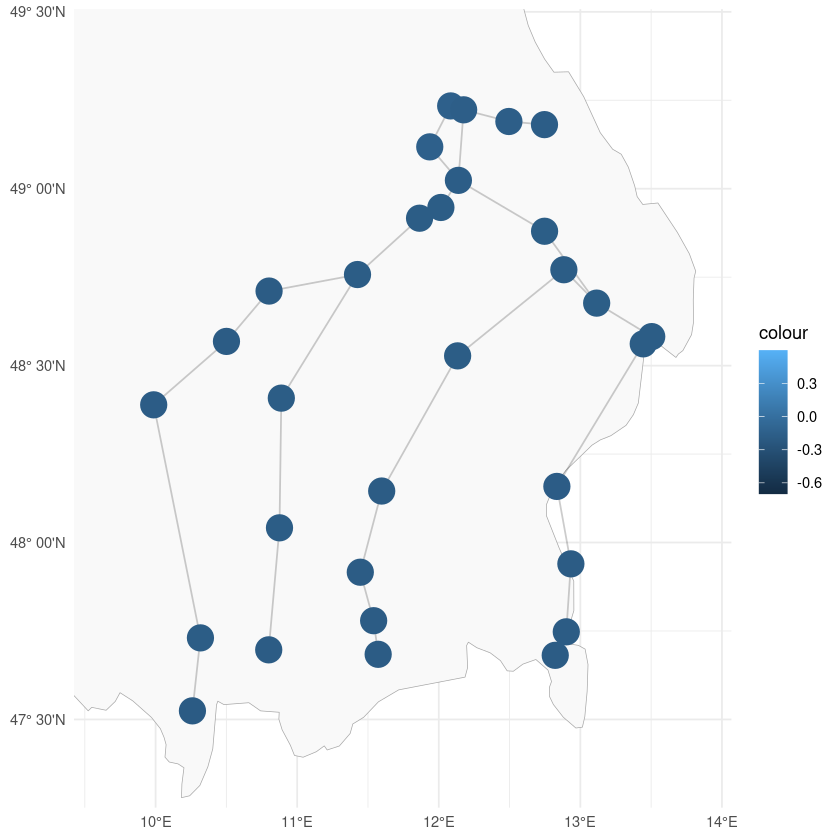

In [22]:
pc1_ds <- p + geom_point(aes(x = lon, y = lat, color = PC1), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc1_ds.pdf", pc1_ds)
pc1_ds

Saving 6.67 x 6.67 in image


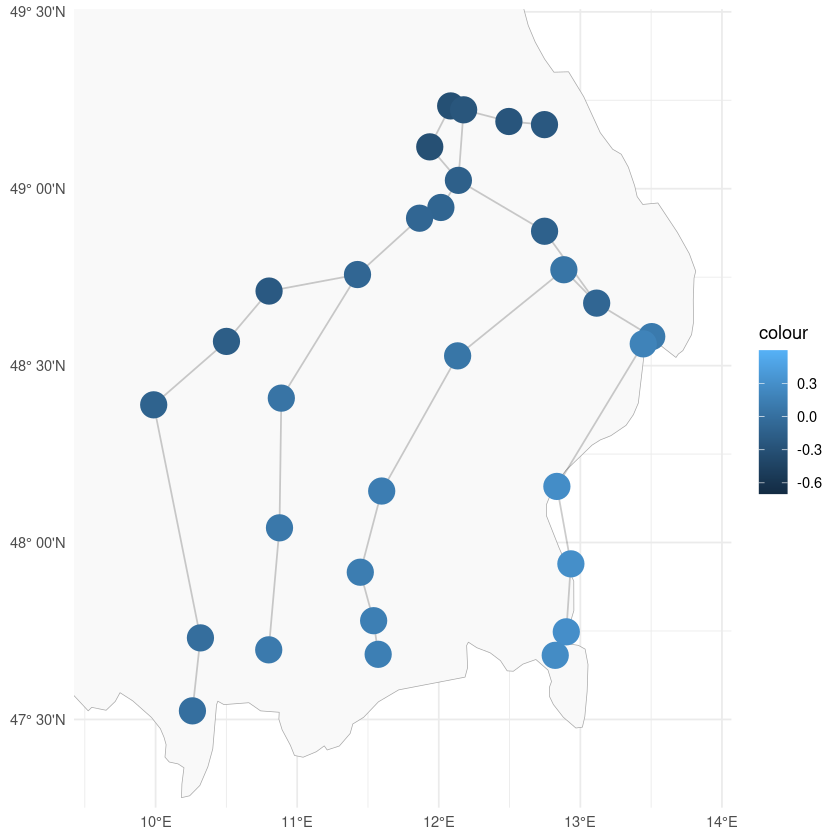

In [23]:
pc2_ds <- p + geom_point(aes(x = lon, y = lat, color = PC2), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc2_ds.pdf", pc2_ds)
pc2_ds

Saving 6.67 x 6.67 in image


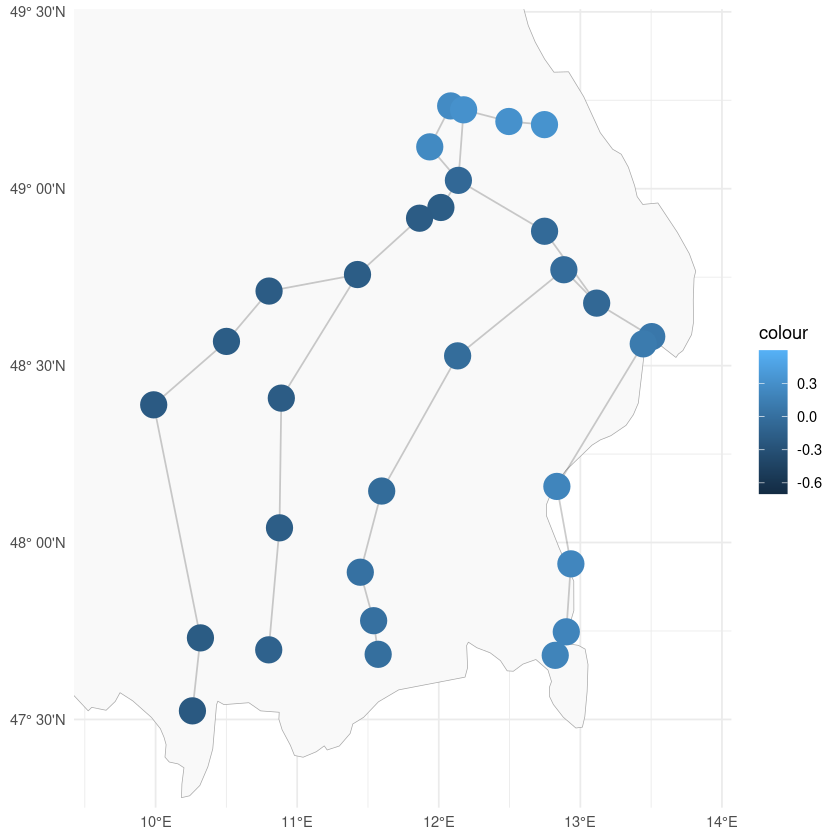

In [24]:
pc3_ds <- p + geom_point(aes(x = lon, y = lat, color = PC3), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc3_ds.pdf", pc3_ds)
pc3_ds

Saving 6.67 x 6.67 in image


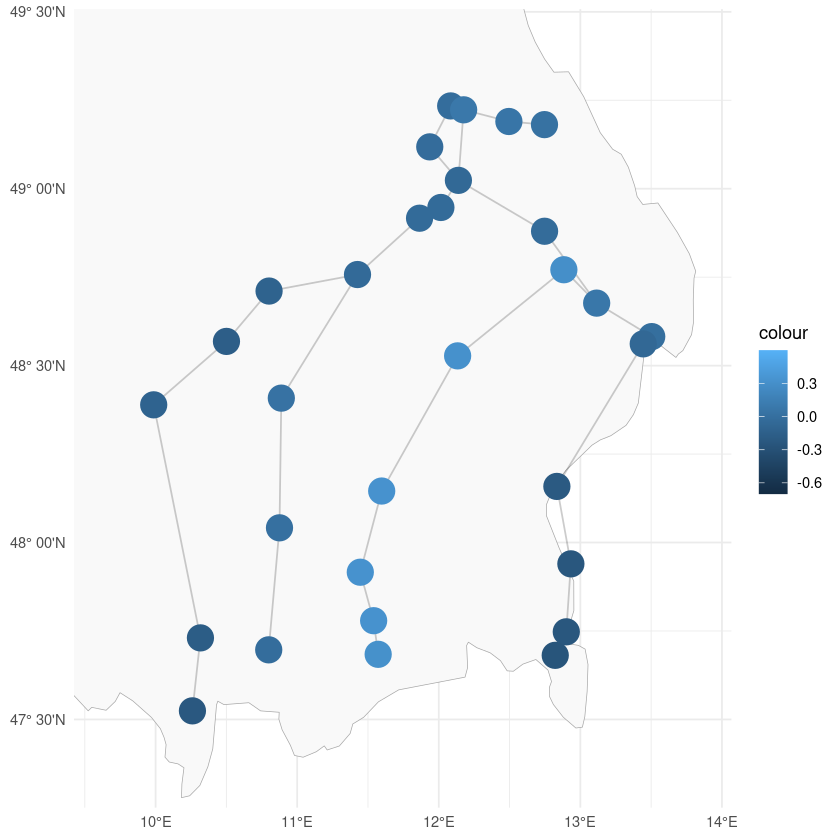

In [25]:
pc4_ds <- p + geom_point(aes(x = lon, y = lat, color = PC4), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc4_ds.pdf", pc4_ds)
pc4_ds

Saving 6.67 x 6.67 in image


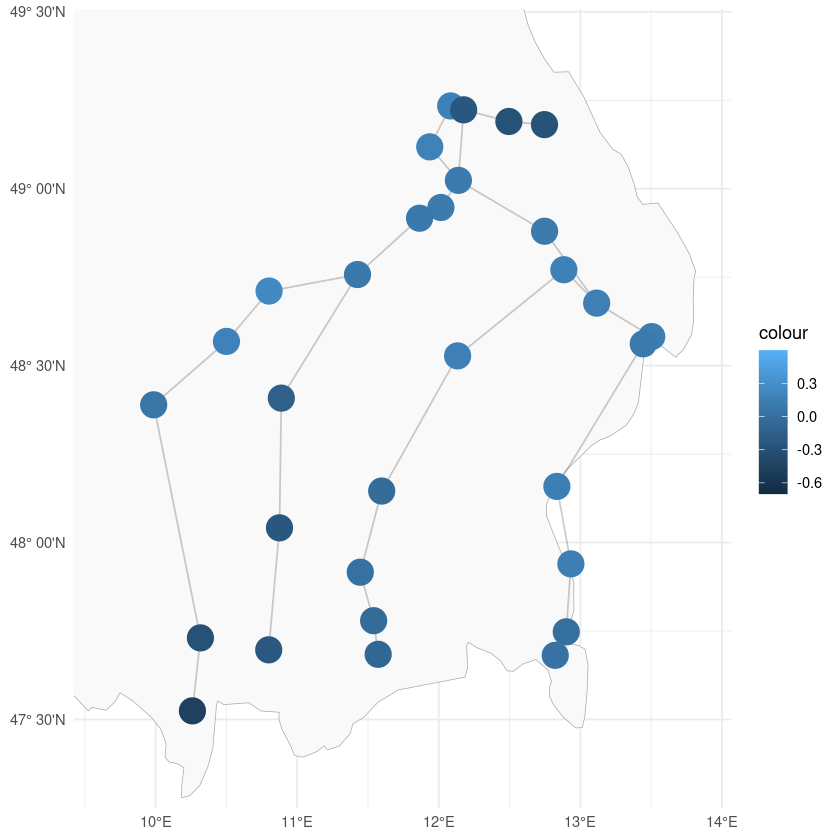

In [26]:
pc5_ds <- p + geom_point(aes(x = lon, y = lat, color = PC5), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc5_ds.pdf", pc5_ds)

pc5_ds

Saving 6.67 x 6.67 in image


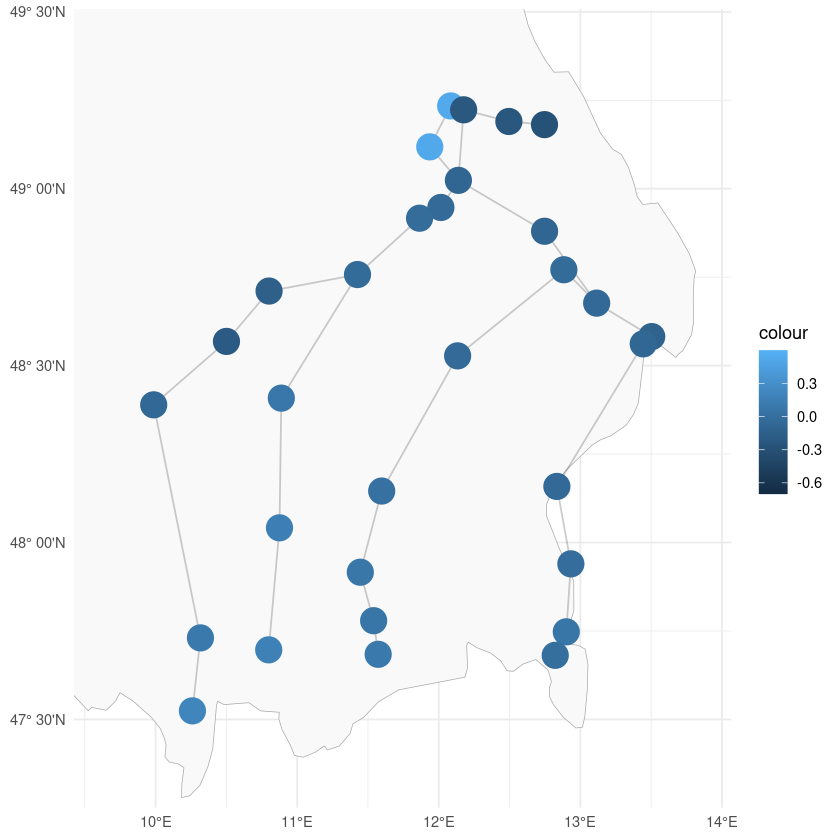

In [27]:
pc6_ds <- p + geom_point(aes(x = lon, y = lat, color = PC6), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7,0.6))

ggsave("danube_pc6_ds.pdf", pc6_ds)
pc6_ds

In [28]:
rec <- Xtrafo %*% specdecomp$vectors[,1:6] %*% t(specdecomp$vectors[,1:6])
ds_rec_dat <- data.frame(rec)
ds_rec_dat <- full_join(data.frame(Xtrafo), ds_rec_dat)
ds_rec_dat$is_rec <- c(rep(F, dim(rec)[1]), rep(T, dim(rec)[1]))

Joining with `by = join_by(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12,
X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28,
X29, X30, X31)`


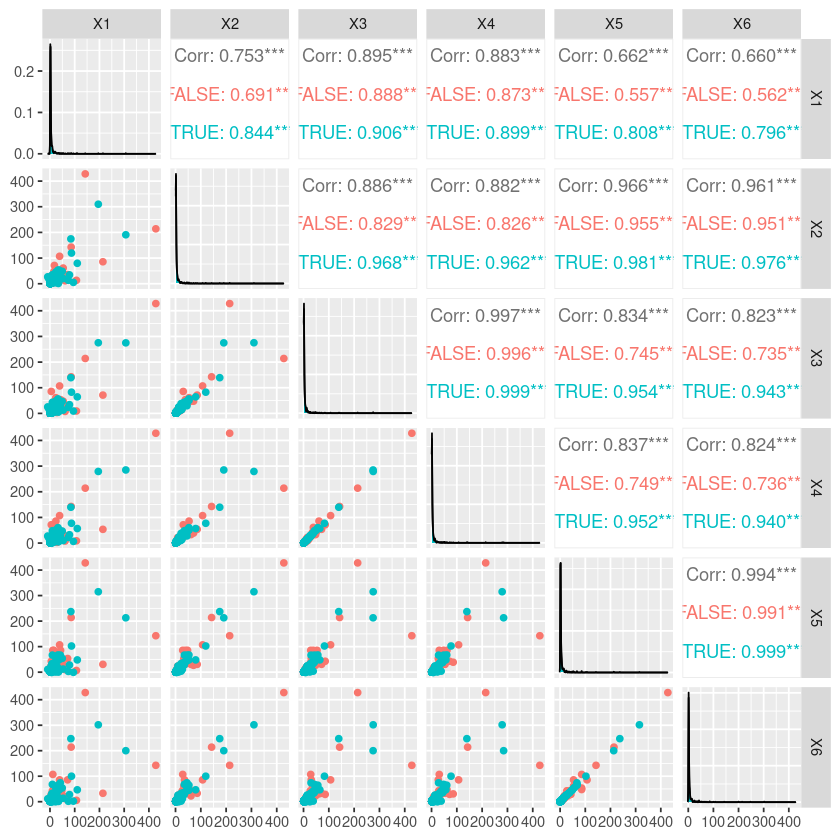

In [29]:
ggpairs(ds_rec_dat, columns = 1:6, aes(color = is_rec))

# Cooley Thibaud PCA for extremes 

In [30]:
# Tail pairwise dependence matrix code by Yiang 

decls <- function(x, th, k) {
    ## Ordinary decluster.
    id.big <- which(x > th)
    id.dif <- diff(id.big)
    tick <- which(id.dif >= k)
    start <- id.big[c(1, tick + 1)]              # Where a new cluster begins
    end <- c(id.big[tick], last(id.big, 1))
    n <- length(start)
    id.res <- rep(0, n)
    for ( i in 1 : n) {
        temp <- x[start[i] : end[i]]
        id.res[i] <- which(temp == max(temp, na.rm = TRUE))[1] + start[i] - 1
    }
    id.res
}

rw.Sigma <- function(X, u = 0.98, decluster = F) {
    ## Compute TPDM
    P <- ncol(X)                      # Number of stations
    M <- nrow(X)                      # Number of obs
    Sigma <- matrix(0, P, P)
    for ( i in 1 : P) {
        if (i %% 5 == 0) print(i)
        for ( j in 1 : P) {
            r <- sqrt(X[, i] ^ 2 + X[, j] ^ 2)
            w1 <- X[, i] / r
            w2 <- X[, j] / r
            th <- quantile(r, u, na.rm = TRUE)
            if(decluster) {
                id <- decls(r, th, 5)
            } else {
                id <- which(r > th)
            } 
            Sigma[i, j] <- sum(w1[id] * w2[id], na.rm = TRUE) / (length(id)) * 2
        }
    }
    Sigma
}

rw.Sigma.full <- function(X, u = 0.98, decluster = F) {
    ## Compute TPDM
    P <- ncol(X)                      # Number of stations
    M <- nrow(X)                      # Number of obs
    Sigma <- matrix(0, P, P)
    for ( i in 1 : P) {
        if (i %% 5 == 0) print(i)
        for ( j in 1 : P) {
            r <- sqrt(X[, i] ^ 2 + X[, j] ^ 2)
            w1 <- X[, i] / r
            w2 <- X[, j] / r
            th <- quantile(r, u, na.rm = TRUE)
            if(decluster) {
                id <- decls(r, th, 5)
            } else {
                id <- which(r > th)
            } 
            Sigma[i, j] <- sum(w1[id] * w2[id], na.rm = TRUE) / (length(id)) * 2
        }
    }
    Sigma
}


##applies the transformation t
trans <- function(x)
{
    ##because it takes an exponential, this function flakes out if x is too big
    ##hence for big values of x, we return x
    v <- log(1 + exp(x))
    id <- which(x < -20)
    v[!is.finite(v)] <- x[!is.finite(v)]
    v[id] <- exp(x[id])
    return(v)
}

##applies the inverse transformation t^{-1}
invTrans <- function(v)
{
    ##same trickeration for big values of v
    ##still returns -Inf if v is machine zero
    x <- log(exp(v) - 1)
    x[!is.finite(x) & v > 1 & !is.na(x)] <- v[!is.finite(x) & v > 1 &
                                                  !is.na(x)]

    return(x)
}

In [31]:
# use a multiplicatively rescaled estimator to ensure that the ecdf does not take the values 0 and 1.
ecdf_shifted <- function(z) length(z) / (length(z) + 1) * ecdf(z)(z)

In [32]:
summary(ecdf_shifted(Xtrafo))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002035 0.250659 0.501243 0.501167 0.751526 0.999925 

In [33]:
# Transform data to approximately 2-Fréchet margins 
Xtrafo_2frech <- apply(Xtrafo, 2, function(z) 1 / sqrt(-log(ecdf_shifted(z))))

In [34]:
X2sphere <- t(apply(Xtrafo_2frech, 1, function(z) z / max(z)))
rownorms <- apply(Xtrafo_2frech, 1, max)

# for t = 10.4 we have the same number of observations exceeding the threshold as for the other procedure
X2sphere_extr <- X2sphere[which(rownorms > 3.3333), ]
tpdm <- t(X2sphere_extr) %*% X2sphere_extr / 117

In [35]:
summary(Xtrafo_2frech[which(rownorms > 3.3333), ])

       X1                X2               X3               X4        
 Min.   : 0.8976   Min.   : 1.001   Min.   : 0.886   Min.   : 0.933  
 1st Qu.: 1.8495   1st Qu.: 1.941   1st Qu.: 1.930   1st Qu.: 1.967  
 Median : 2.6362   Median : 2.577   Median : 2.612   Median : 2.636  
 Mean   : 3.3910   Mean   : 3.416   Mean   : 3.413   Mean   : 3.423  
 3rd Qu.: 3.7634   3rd Qu.: 3.815   3rd Qu.: 3.763   3rd Qu.: 3.815  
 Max.   :20.7002   Max.   :20.700   Max.   :20.700   Max.   :20.700  
       X5                X6               X7                X8         
 Min.   : 0.9034   Min.   : 0.939   Min.   : 0.9122   Min.   : 0.8116  
 1st Qu.: 1.9526   1st Qu.: 2.017   1st Qu.: 1.9609   1st Qu.: 1.7766  
 Median : 2.6118   Median : 2.612   Median : 2.6362   Median : 2.5881  
 Mean   : 3.4287   Mean   : 3.420   Mean   : 3.4179   Mean   : 3.3559  
 3rd Qu.: 3.7634   3rd Qu.: 3.763   3rd Qu.: 3.7634   3rd Qu.: 3.7634  
 Max.   :20.7002   Max.   :20.700   Max.   :20.7002   Max.   :20.7002  
      

In [36]:
length(which(rownorms > 3.3333))

[1] 114

In [37]:
summary(rowSums(Xtrafo_2frech))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.48   28.73   38.95   53.01   58.06  433.83 

In [38]:
tpdm

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
X1,0.2853375,0.2624549,0.2587929,0.2583119,0.2605846,0.2597920,0.2605915,0.2521000,0.2555183,0.2534883,⋯,0.2646531,0.2221784,0.2224748,0.2440477,0.2438665,0.2528424,0.2705120,0.2725339,0.2759096,0.2751805
X2,0.2624549,0.2731980,0.2706881,0.2711709,0.2736110,0.2726816,0.2731868,0.2722158,0.2712644,0.2675546,⋯,0.2575829,0.2359747,0.2373289,0.2490027,0.2491009,0.2502970,0.2446268,0.2457772,0.2434759,0.2439603
X3,0.2587929,0.2706881,0.2748583,0.2751064,0.2749719,0.2731590,0.2744711,0.2764657,0.2754442,0.2705009,⋯,0.2555272,0.2405518,0.2414634,0.2535583,0.2536734,0.2547206,0.2419207,0.2439211,0.2402236,0.2409473
X4,0.2583119,0.2711709,0.2751064,0.2779592,0.2772478,0.2749533,0.2760595,0.2803041,0.2792604,0.2737470,⋯,0.2557622,0.2431019,0.2436679,0.2542716,0.2548051,0.2560173,0.2425397,0.2438286,0.2397852,0.2407021
X5,0.2605846,0.2736110,0.2749719,0.2772478,0.2861327,0.2839384,0.2847484,0.2855411,0.2846150,0.2806984,⋯,0.2656001,0.2330789,0.2334182,0.2425137,0.2437257,0.2458610,0.2465033,0.2472560,0.2427694,0.2434166
X6,0.2597920,0.2726816,0.2731590,0.2749533,0.2839384,0.2842128,0.2844267,0.2844547,0.2841476,0.2807599,⋯,0.2667248,0.2308621,0.2315102,0.2405974,0.2415417,0.2434593,0.2474354,0.2477741,0.2433641,0.2443199
X7,0.2605915,0.2731868,0.2744711,0.2760595,0.2847484,0.2844267,0.2871521,0.2862327,0.2853094,0.2817588,⋯,0.2673220,0.2311260,0.2317953,0.2422011,0.2432514,0.2448293,0.2494325,0.2499071,0.2457692,0.2468654
X8,0.2521000,0.2722158,0.2764657,0.2803041,0.2855411,0.2844547,0.2862327,0.3018475,0.2975953,0.2903705,⋯,0.2499154,0.2402676,0.2405956,0.2477182,0.2488435,0.2492198,0.2409209,0.2423632,0.2373138,0.2385220
X9,0.2555183,0.2712644,0.2754442,0.2792604,0.2846150,0.2841476,0.2853094,0.2975953,0.3006503,0.2926418,⋯,0.2550839,0.2342384,0.2354203,0.2463807,0.2472033,0.2505494,0.2453432,0.2480623,0.2420720,0.2428481
X10,0.2534883,0.2675546,0.2705009,0.2737470,0.2806984,0.2807599,0.2817588,0.2903705,0.2926418,0.2933986,⋯,0.2578393,0.2299559,0.2307341,0.2403768,0.2413846,0.2441042,0.2469702,0.2482615,0.2414749,0.2425138


In [39]:
specdecomp_cy <- eigen(tpdm)
if(specdecomp_cy$vectors[1,1] < 0) specdecomp_cy$vectors[,1] <- -specdecomp_cy$vectors[,1] 

In [40]:
specdecomp_cy

eigen() decomposition
$values
 [1] 7.9671392660 0.3764861769 0.2749025599 0.1398653213 0.0934675290
 [6] 0.0864387577 0.0664125069 0.0268099944 0.0191854884 0.0118794918
[11] 0.0106715455 0.0088885467 0.0062752370 0.0061450481 0.0059668716
[16] 0.0044974049 0.0042446011 0.0034716824 0.0031098783 0.0027791438
[21] 0.0026352819 0.0023277518 0.0021108918 0.0018016877 0.0016896804
[26] 0.0014644242 0.0010652785 0.0010615850 0.0007697402 0.0006612549
[31] 0.0004912653

$vectors
           [,1]          [,2]         [,3]         [,4]         [,5]
 [1,] 0.1817540  0.0992638523  0.082668167  0.020338127  0.061563831
 [2,] 0.1809753 -0.0928626888 -0.066903792  0.087957259  0.091096643
 [3,] 0.1805238 -0.1416235280 -0.066529434 -0.014603641  0.046854997
 [4,] 0.1813021 -0.1551784916 -0.077664752 -0.041182519  0.047381424
 [5,] 0.1836213 -0.0987916199 -0.184523597 -0.039126768  0.060490260
 [6,] 0.1833752 -0.0843187498 -0.192048024 -0.041357843  0.056262487
 [7,] 0.1843796 -0.0795634461 -0.189717

Saving 6.67 x 6.67 in image


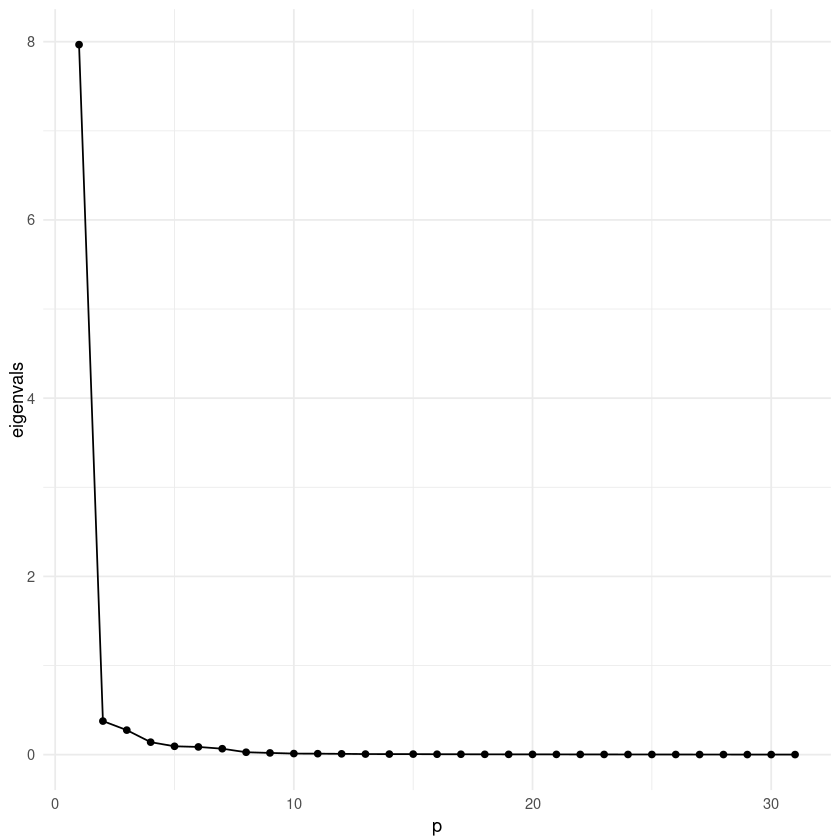

In [41]:
plot_errs_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values)

elbow_dat_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values[1:31])
elbow_cy <- ggplot(aes(x = p, y = eigenvals), data = elbow_dat_cy) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_epca_cy.pdf", elbow_cy)
elbow_cy

Saving 6.67 x 6.67 in image


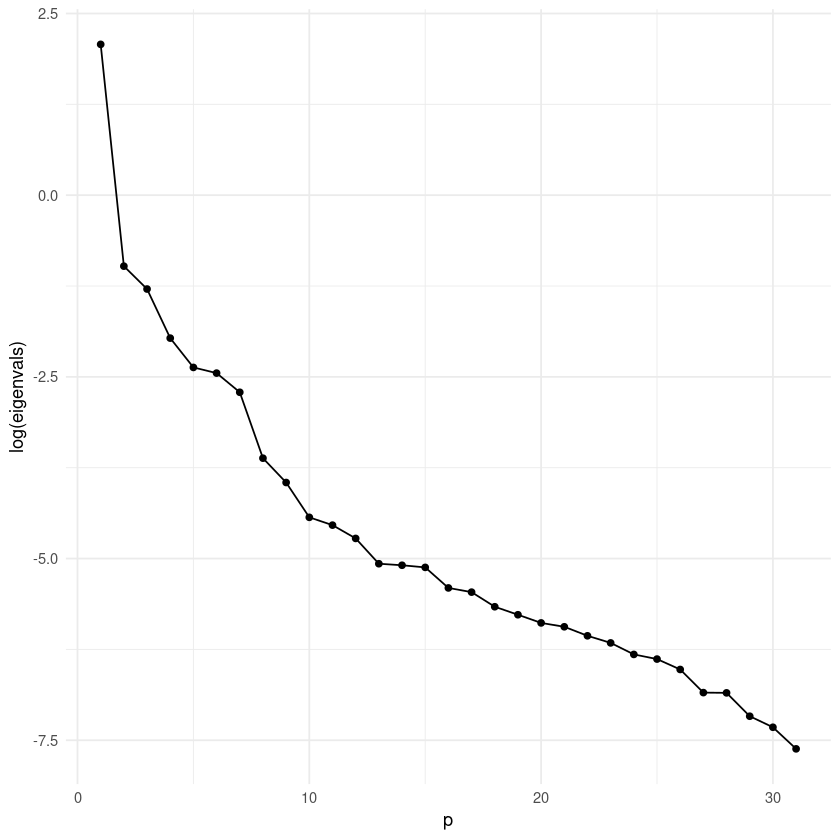

In [42]:
plot_errs_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values)

elbow_dat_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values[1:31])
elbow_cy <- ggplot(aes(x = p, y = log(eigenvals)), data = elbow_dat_cy) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_log_epca_cy.pdf", elbow_cy)
elbow_cy

In [43]:
enc_cy <- specdecomp_cy$vectors
enc_cy <- data.frame(enc_cy)
names(enc_cy) <- paste0("PC", 1:31)
enc_cy$lat <- danube$info$Lat
enc_cy$lon <- danube$info$Long

Saving 6.67 x 6.67 in image


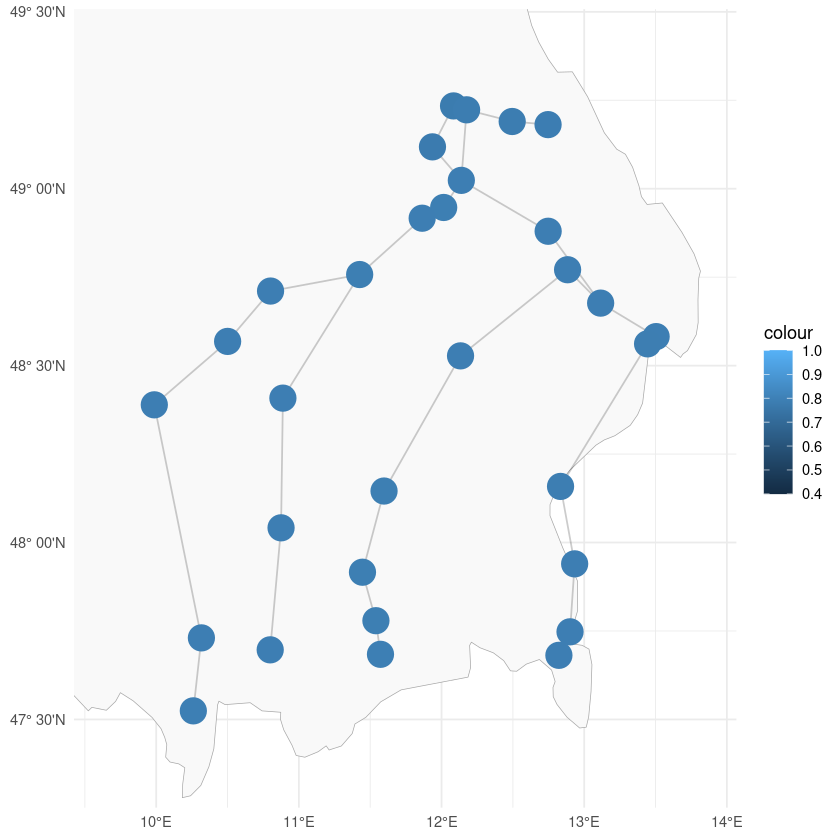

In [44]:
pc1_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC1)), size = 7, data = enc_cy) +
theme_minimal() + 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc1_cy.pdf", pc1_cy)
pc1_cy

Saving 6.67 x 6.67 in image


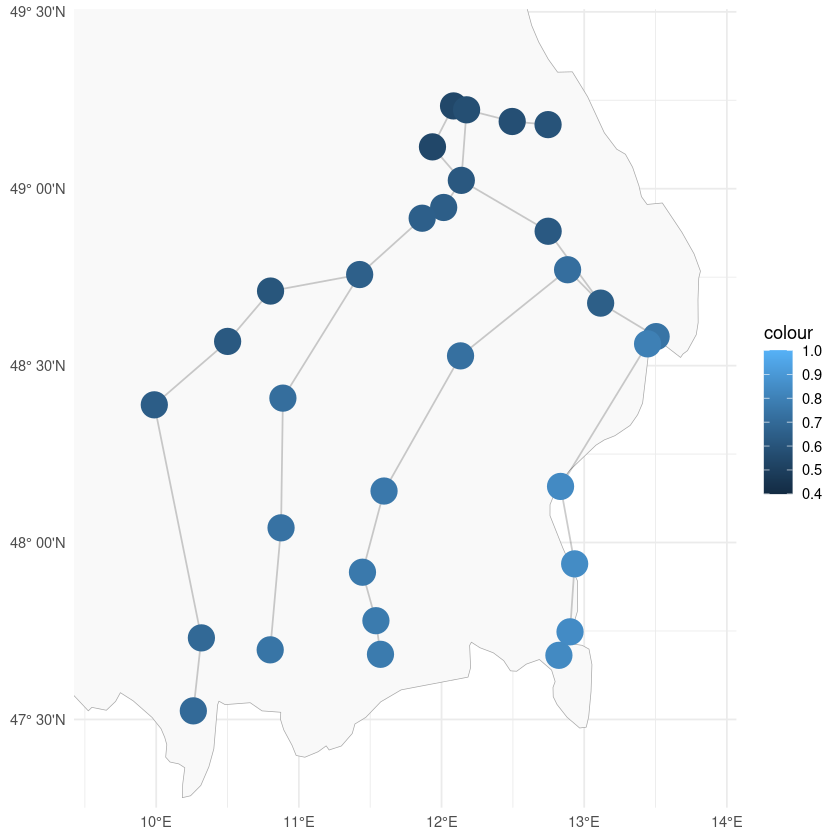

In [45]:
pc2_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC2)), size = 7, data = enc_cy) +
theme_minimal()+ 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc2_cy.pdf", pc2_cy)
pc2_cy

Saving 6.67 x 6.67 in image


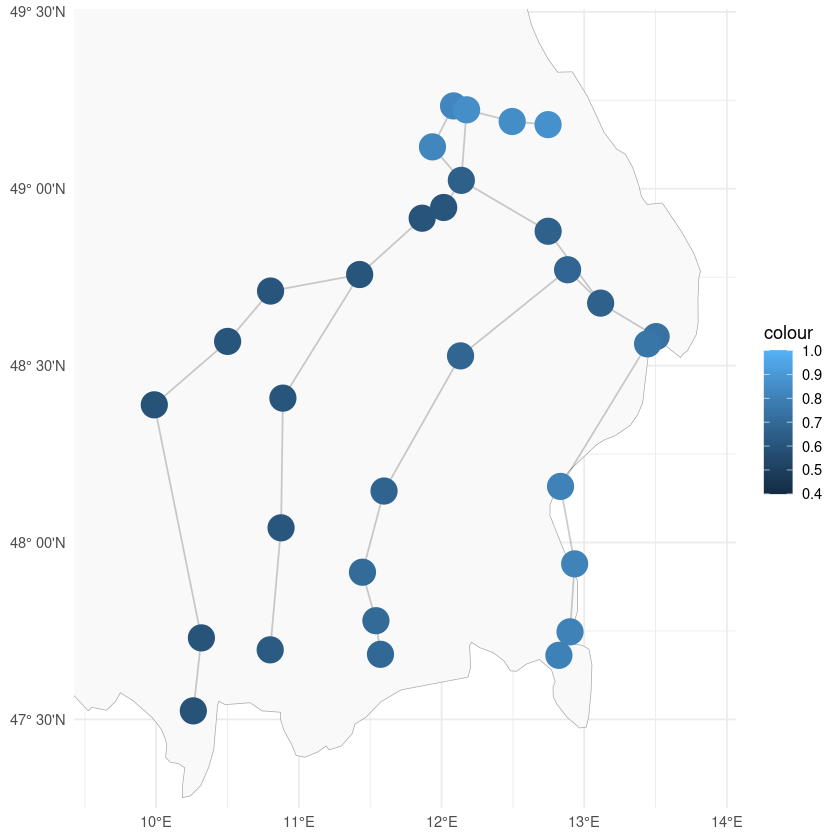

In [46]:
pc3_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC3)), size = 7, data = enc_cy) +
theme_minimal()+ 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc3_cy.pdf", pc3_cy)
pc3_cy

Saving 6.67 x 6.67 in image


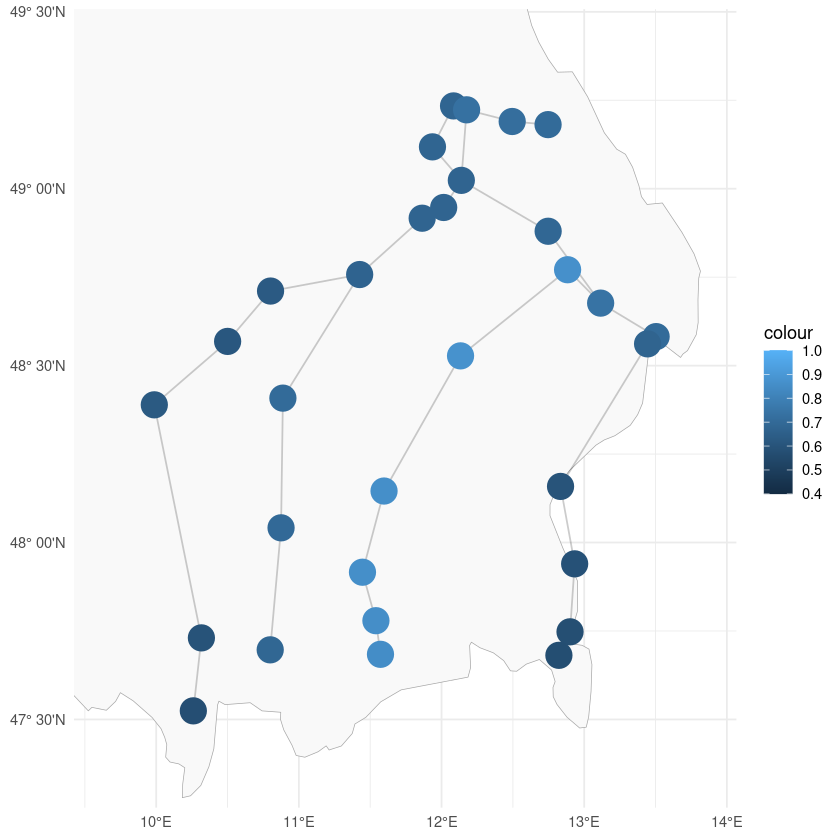

In [47]:
pc4_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC4)), size = 7, data = enc_cy) +
theme_minimal()+ 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc4_cy.pdf", pc4_cy)
pc4_cy

Saving 6.67 x 6.67 in image


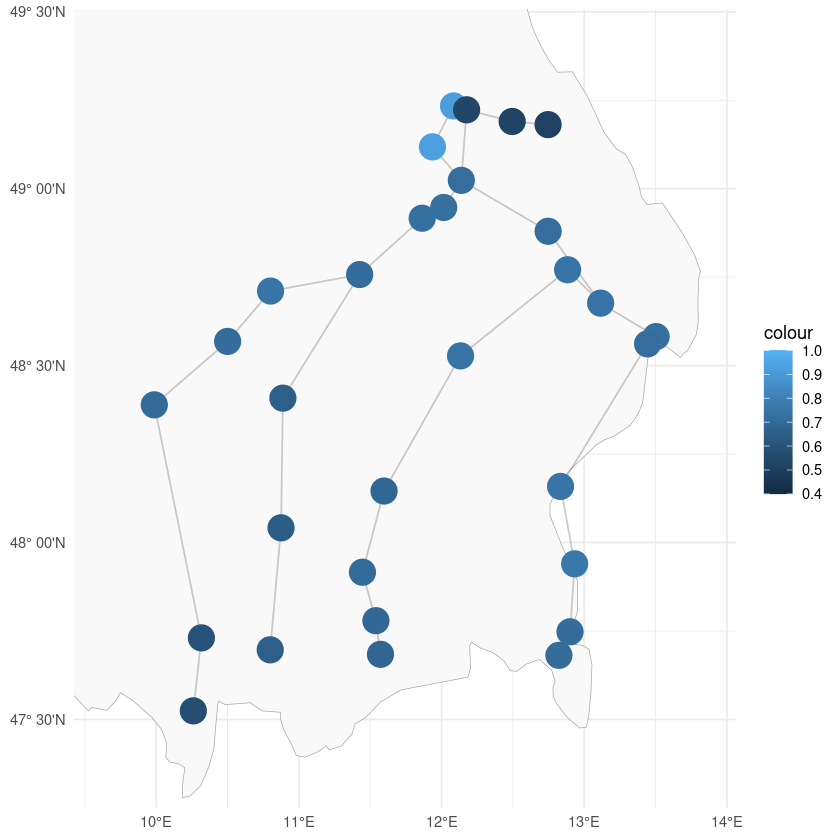

In [48]:
pc5_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC5)), size = 7, data = enc_cy) +
theme_minimal() + 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc5_cy.pdf", pc5_cy)
pc5_cy

Saving 6.67 x 6.67 in image


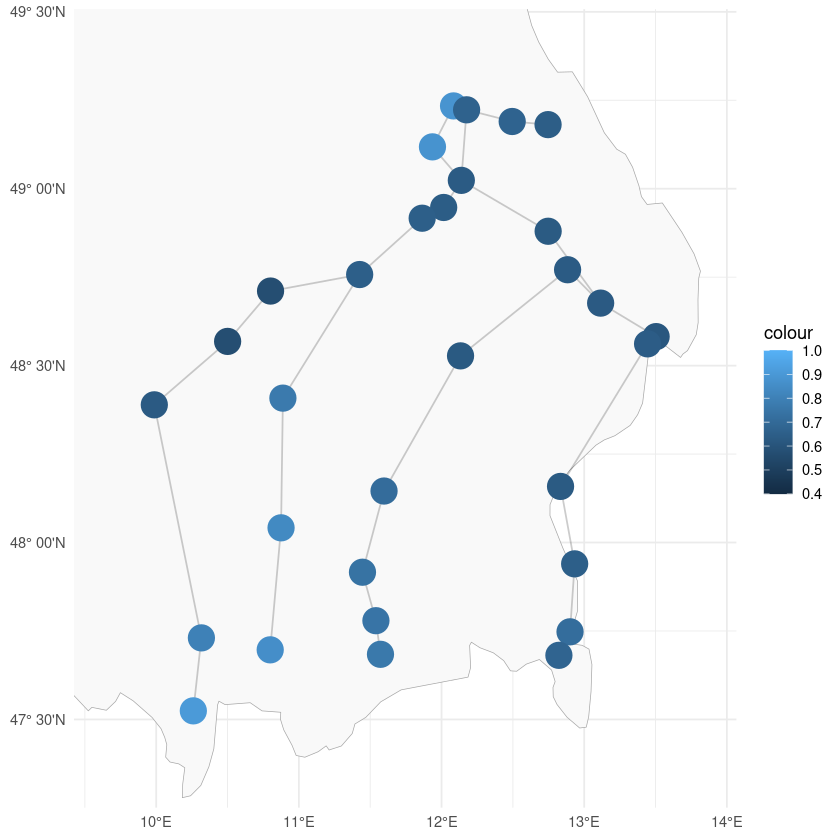

In [49]:
pc6_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC6)), size = 7, data = enc_cy) +
theme_minimal() + 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc6_cy.pdf", pc6_cy)
pc6_cy

### Checking reconstructions

In [50]:
specdecomp_cy

eigen() decomposition
$values
 [1] 7.9671392660 0.3764861769 0.2749025599 0.1398653213 0.0934675290
 [6] 0.0864387577 0.0664125069 0.0268099944 0.0191854884 0.0118794918
[11] 0.0106715455 0.0088885467 0.0062752370 0.0061450481 0.0059668716
[16] 0.0044974049 0.0042446011 0.0034716824 0.0031098783 0.0027791438
[21] 0.0026352819 0.0023277518 0.0021108918 0.0018016877 0.0016896804
[26] 0.0014644242 0.0010652785 0.0010615850 0.0007697402 0.0006612549
[31] 0.0004912653

$vectors
           [,1]          [,2]         [,3]         [,4]         [,5]
 [1,] 0.1817540  0.0992638523  0.082668167  0.020338127  0.061563831
 [2,] 0.1809753 -0.0928626888 -0.066903792  0.087957259  0.091096643
 [3,] 0.1805238 -0.1416235280 -0.066529434 -0.014603641  0.046854997
 [4,] 0.1813021 -0.1551784916 -0.077664752 -0.041182519  0.047381424
 [5,] 0.1836213 -0.0987916199 -0.184523597 -0.039126768  0.060490260
 [6,] 0.1833752 -0.0843187498 -0.192048024 -0.041357843  0.056262487
 [7,] 0.1843796 -0.0795634461 -0.189717

In [51]:
enc_cy <- t(specdecomp_cy$vectors[, 1:6]) %*% t(invTrans(Xtrafo_2frech))
rec_cy <- t(specdecomp_cy$vectors[, 1:6] %*% trans(enc_cy))

In [52]:
enc_cy

11.4239418,7.7291965,6.0960904,6.1586718,5.5146967,4.05290533,9.2560107,1.68891052,1.1422029,9.9774182,⋯,-0.08535324,2.10658014,36.443039,26.5756582,16.89683097,12.7667170,14.95673421,6.9176897,1.4035549,4.8652960
4.3668888,0.8504433,1.7541813,0.2523135,2.0878766,2.30175843,0.5292834,-0.11210618,0.5015803,-2.5974484,⋯,0.51037871,0.37664409,8.353701,-7.0997458,-0.05789931,-2.8604883,0.96065586,-3.9602589,0.7394982,-0.1059730
-1.2688625,-2.0550955,-0.9462435,-1.6994479,-1.5456947,-0.04710137,-2.0663333,-1.26161436,-0.2545579,4.3965066,⋯,2.43121619,1.29266764,6.196145,-9.4035836,-1.55276109,-3.6330088,0.00993976,2.7834238,2.0019602,1.2423384
-2.7051034,0.7358510,1.1467000,0.8138723,1.1395342,1.29373781,-0.1209962,-0.87881731,0.1336098,-1.3601012,⋯,-0.49264214,0.51346994,-1.905123,-0.3069108,-1.34664506,-1.1253085,2.29175465,1.0007812,-0.5646306,1.0521059
-0.7333658,-1.0073004,-1.5092657,-1.2402554,-0.5899199,-0.99905070,-1.6734851,0.02450135,-0.5057077,-1.3227962,⋯,-0.62590177,-0.62876355,2.005647,-0.6893827,-1.31930158,0.9110064,0.17983067,-0.9785511,-0.1646475,-0.5960788
-0.9922781,-1.2645553,-0.1717166,-1.8209442,0.6212301,-0.15407320,-0.2941014,-0.26908741,-0.8580387,0.6875368,⋯,-0.29501642,-0.09131857,-3.312067,-3.2900120,3.34641188,-2.7885816,-0.80379556,-0.1797377,-0.5171370,-0.1400629


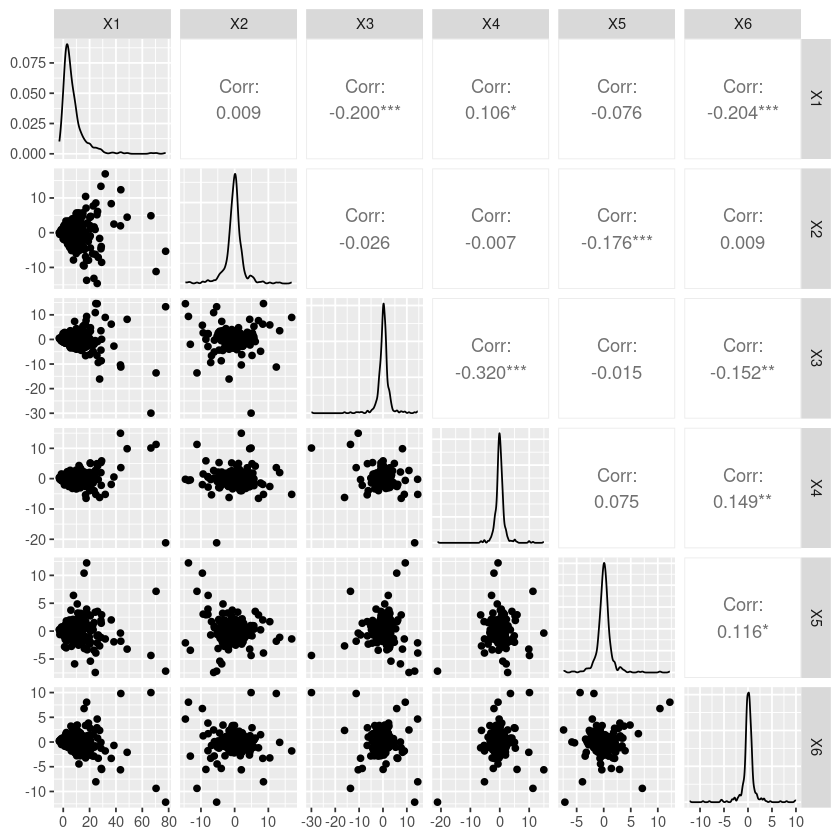

In [53]:
ggpairs(data.frame(t(enc_cy)))

In [54]:
dim(Xtrafo_2frech)

[1] 428  31

Joining with `by = join_by(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12,
X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28,
X29, X30, X31)`


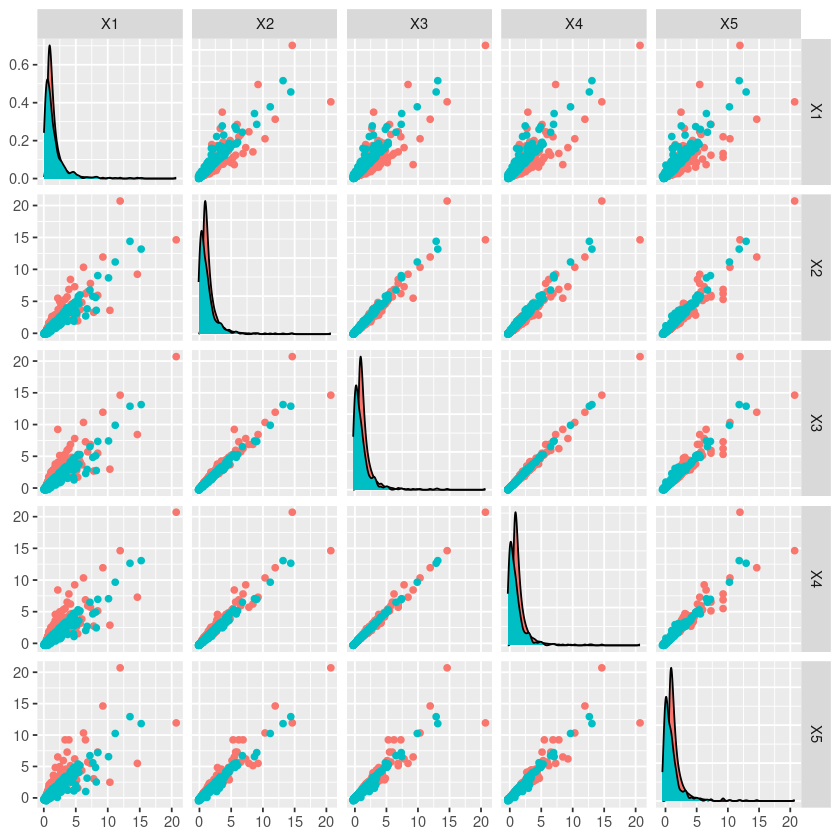

In [55]:
pairs_dat <- data.frame(Xtrafo_2frech)
tmp <- data.frame(rec_cy)
pairs_dat <- full_join(pairs_dat, tmp)
pairs_dat$is_rec <- c(rep("False", 428), rep("True", 428))

ggpairs(pairs_dat, columns = 1:5, aes(color = is_rec), upper = list(continuous = "points"))

### Apply spherical K-means to the danube dataset

In [56]:
library(skmeans)

kmeanserrs = data.frame(k = 2:15, errs = NA)
kmeansclusterings = list()
for(k in 2:15) {
    tmp <- skmeans::skmeans(Xtrafo[which(apply(Xtrafo, 1, max) > 10), ], k = k)
    kmeansclusterings[[k]] <- tmp
    kmeanserrs[k,2] <- tmp$value
}

Saving 6.67 x 6.67 in image
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


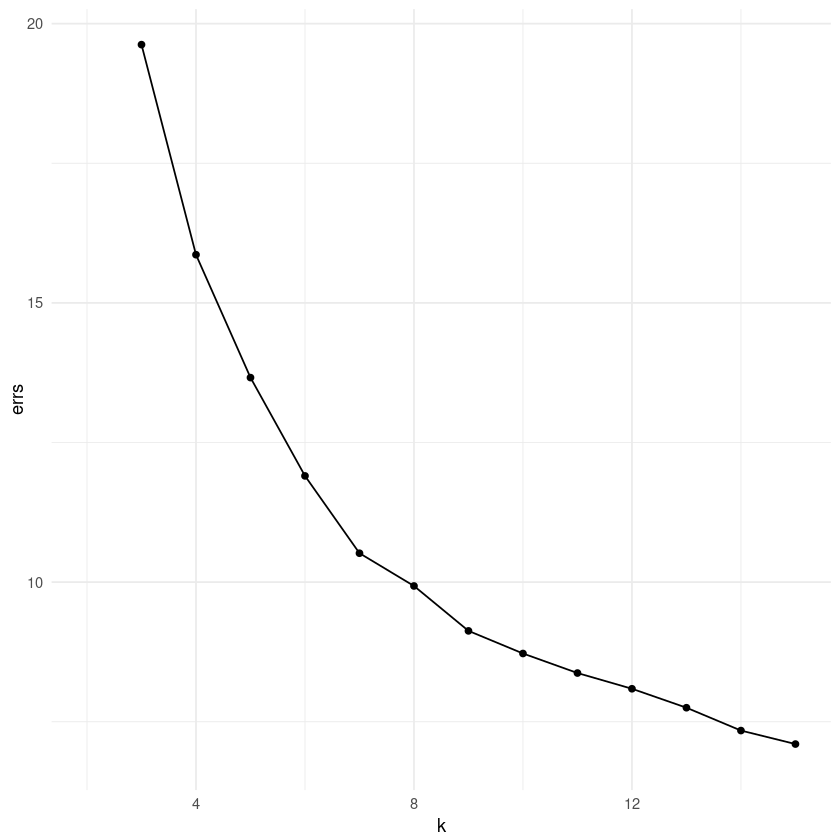

In [57]:
elbow_jw <- ggplot(aes(x = k, y = errs), data = kmeanserrs) + 
geom_line() +
geom_point() + 
theme_minimal()

ggsave("danube_elbow_kmjw.pdf", elbow_jw)
elbow_jw

In [58]:
prototypes_dat <- data.frame(t(kmeansclusterings[[6]]$prototypes))
names(prototypes_dat) <- paste0("P", 1:6)
prototypes_dat$lat = danube$info$Lat
prototypes_dat$lon = danube$info$Long

Saving 6.67 x 6.67 in image


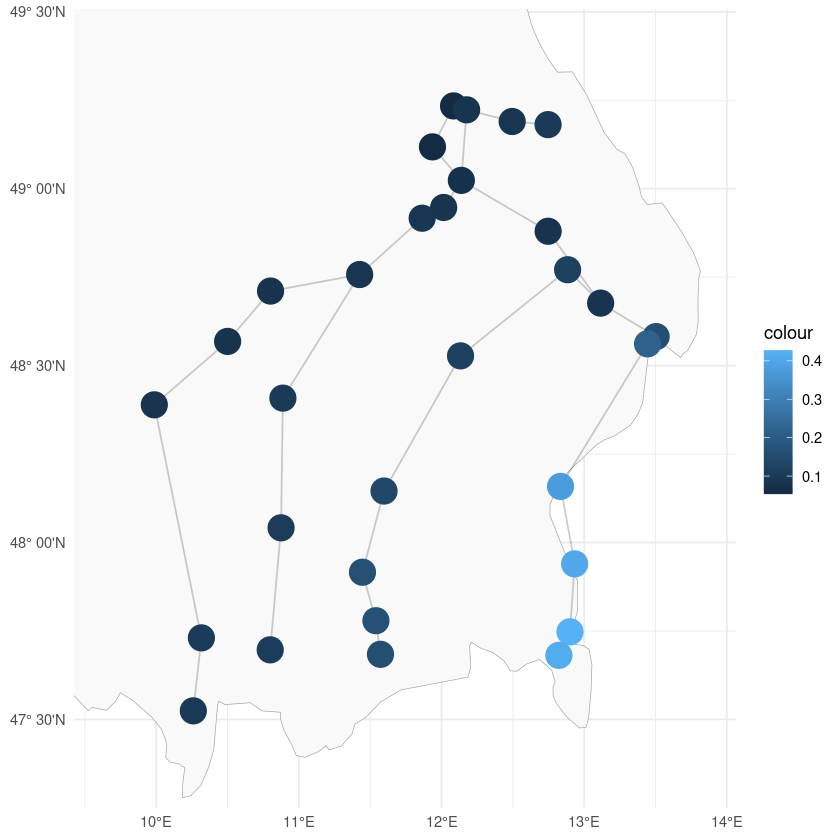

In [59]:
c1 <- p + geom_point(aes(x = lon, y = lat, color = P1), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c1_jw.pdf", c1)
c1

Saving 6.67 x 6.67 in image


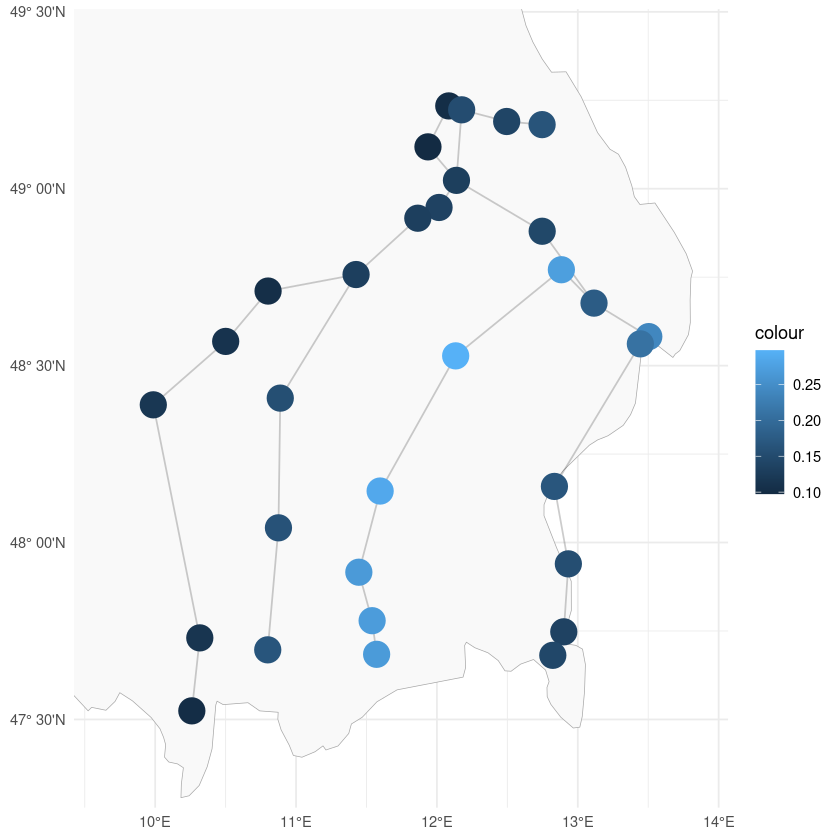

In [60]:
c2 <- p + geom_point(aes(x = lon, y = lat, color = P2), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c2_jw.pdf", c2)
c2

Saving 6.67 x 6.67 in image


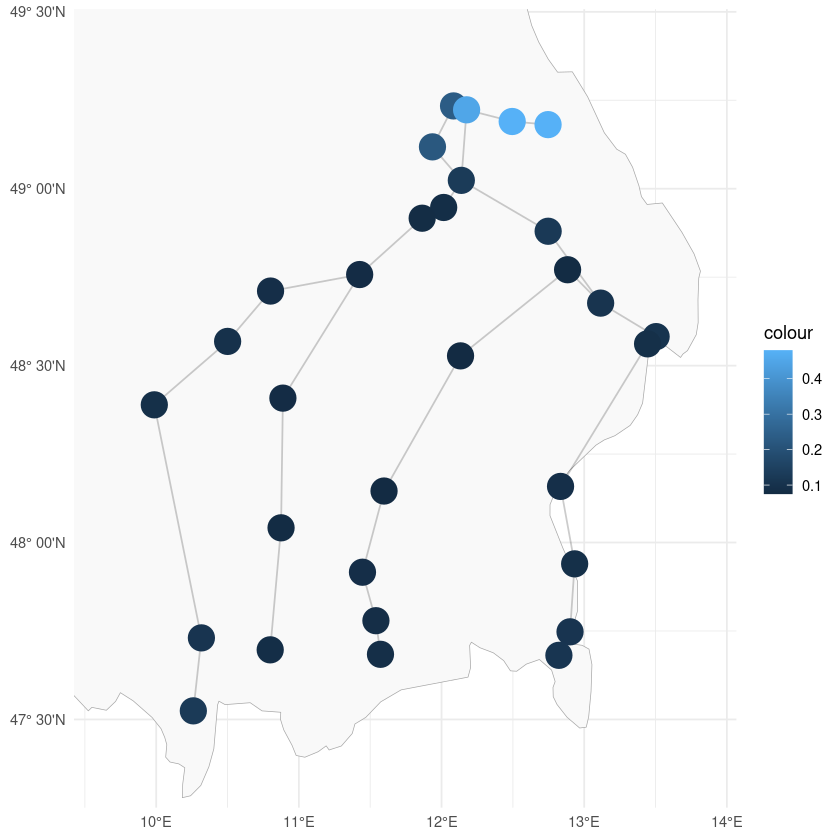

In [61]:
c3 <- p + geom_point(aes(x = lon, y = lat, color = P3), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c3_jw.pdf", c3)
c3

Saving 6.67 x 6.67 in image


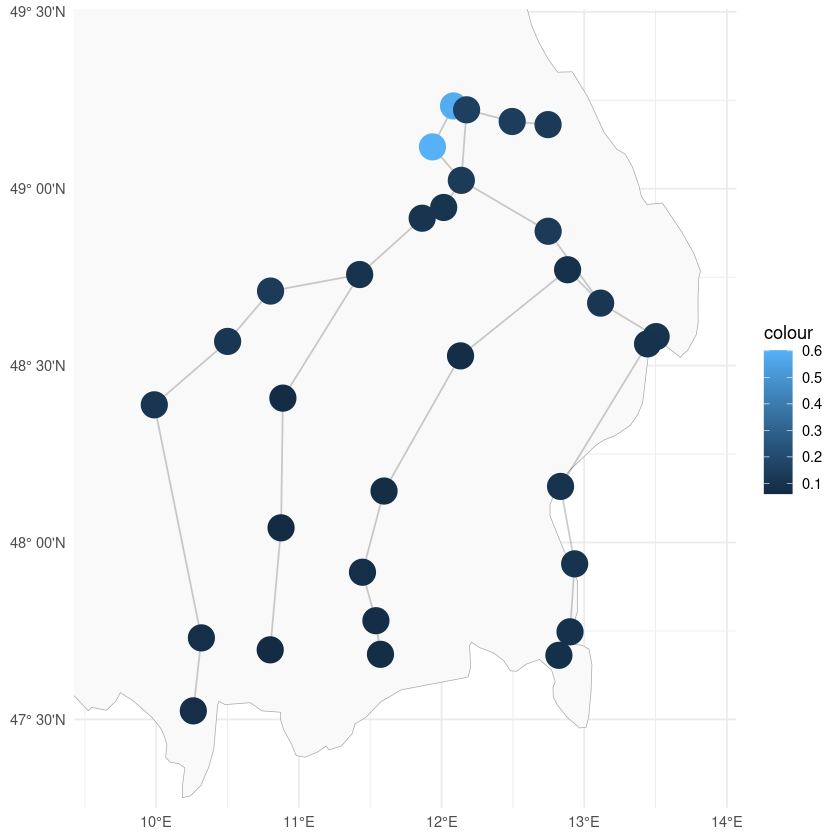

In [62]:
c4 <- p + geom_point(aes(x = lon, y = lat, color = P4), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c4_jw.pdf", c4)
c4

Saving 6.67 x 6.67 in image


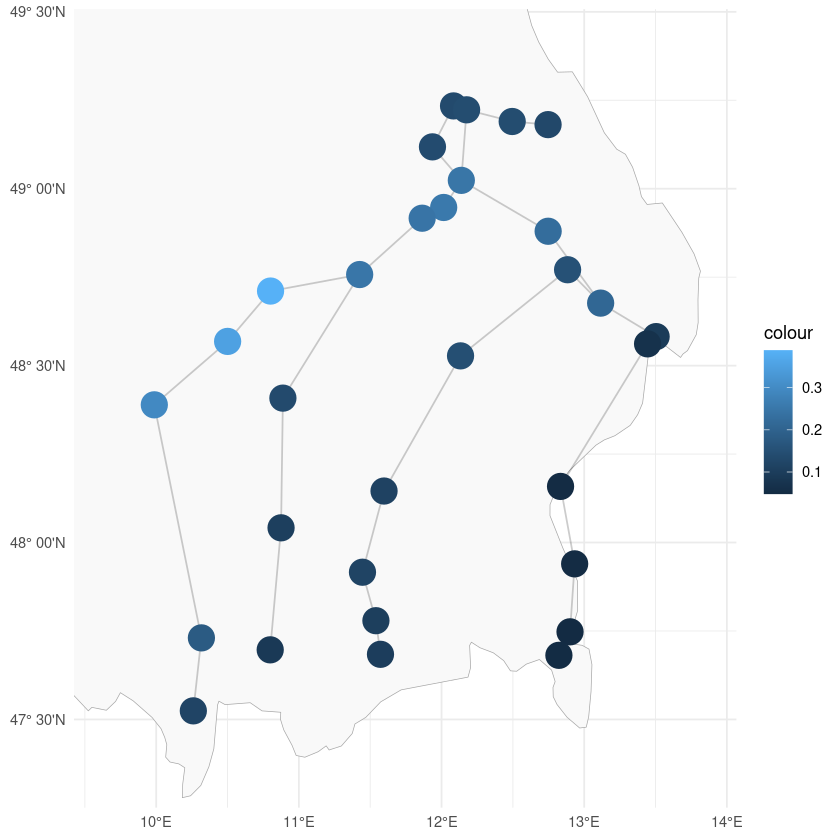

In [63]:
c5 <- p + geom_point(aes(x = lon, y = lat, color = P5), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c5_jw.pdf", c5)
c5

Saving 6.67 x 6.67 in image


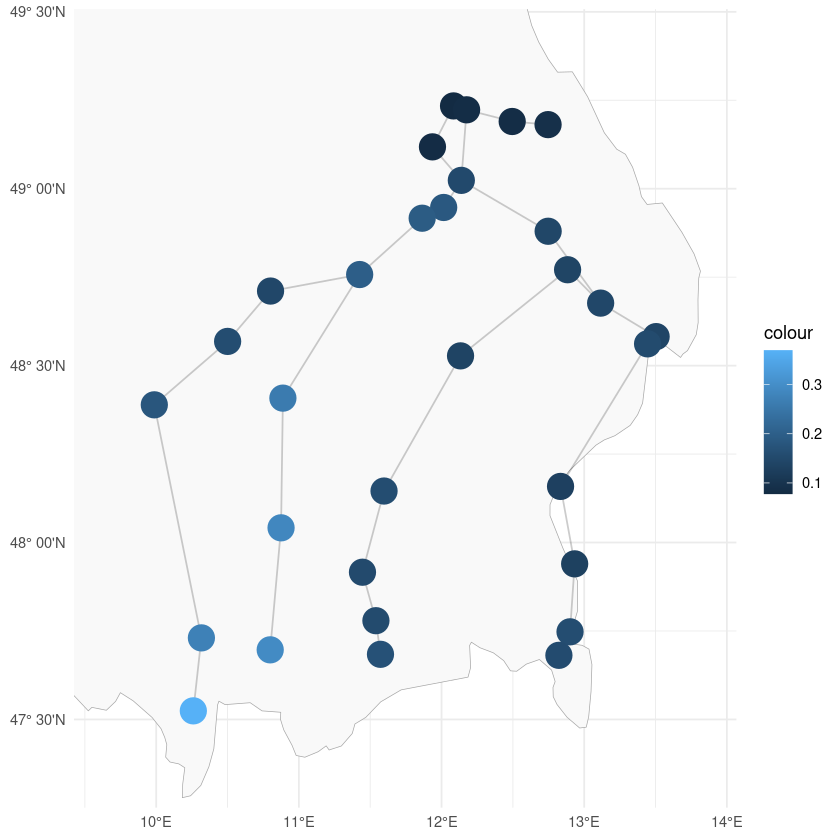

In [64]:
c6 <- p + geom_point(aes(x = lon, y = lat, color = P6), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c6_jw.pdf", c6)
c6